# Question 1


$z' = az + by + c$
$z = y'$

$0< x<1$

$z(1) = 1$
$y(0) = 0$

# Question 2

Solving for $y$ we get that

$y(x) = \dfrac{c_1 e^{a x}} {a} + c_2$

And, $z(x) = {c_1 e^{a x}} $

As a result,

most basic version starts with a single-variable function f defined for a real variable x, the function's derivative f ′, and an initial guess x0 for a root of f. If the function satisfies sufficient assumptions and the initial guess is close, then

 $ x_1 = x_0 − f ( x_0 )/ f ' ( x_0 ) $

# Question 3

We are given the equation 

$-(a(x)y')' + b(x)y' + c(x)y = d(x)$ 

$0<x<1$

$y(0) = 0$ $y'(1) = 0$

The weak formulation of the equation


$\int (-(a(x)y')' + b(x)y' + c(x)y) v(x)dx = \int d(x) v(x) dx $ 




$Au = f$

involves finding $u\in V$ such that for all $v\in V$ the following equation holds:

$\langle Au,v \rangle = \langle f,v \rangle$

where $\langle \cdot,\cdot \rangle$ denotes an inner product.


The result is

$-(a(x)u')' + u = f(x)$ 

$0<x<1$


$u(0) = 1$

$u'(1) = -2u(1) + 3$




# Question 4
-y+y=f(x),0<x<1,

y(0)=0,y'(1)=0.


$\sum_{i=1}^{N} \beta_i (\sum_{j=1}^{N} K_{ij} \alpha_j - F_i) = 0$

$K_{ij} = \int_0^1 \phi'_j(x) \phi_i'(x) + \phi_j(x) \phi(x) dx$

$F=  \int_{0}^{1} x \phi_i(x) dx$

The hat function basis is
 
$$ \phi(x) = \begin{cases} \dfrac{x-x_{i-1}}{h_i} & x_{i-1} \leq x \leq x_i \\ \dfrac{x_{i+1} - x}{h_{i+1}} & x_i \leq x \leq x_{i+1} \\ 0 & o.w.
\end{cases}$$



# Question 5




In [49]:
using LinearAlgebra
using Pkg
using PyPlot
using Distributions

Pkg.add("NLsolve")
using NLsolve



  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 % [=======>                                 ]  16.9 %]  33.7 %                     ]  47.4 %==========================>              ]  64.3 %]  81.1 % [========================================>]  98.0 % Resolving package versions...
 Installed Parsers ────── v0.3.12
 Installed LaTeXStrings ─ v1.1.0
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [34da2185] - Compat v2.2.0
  [b964fa9f] ↑ LaTeXStrings v1.0.3 ⇒ v1.1.0
  [69de0a69] ↑ Parsers v0.3.11 ⇒ v0.3.12
  [8bb1440f] - DelimitedFiles 
  [1a1011a3] - SharedArrays 


┌ Info: Recompiling stale cache file /home/erichschulman/.julia/compiled/v1.0/NLsolve/KFCNP.ji for NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1190


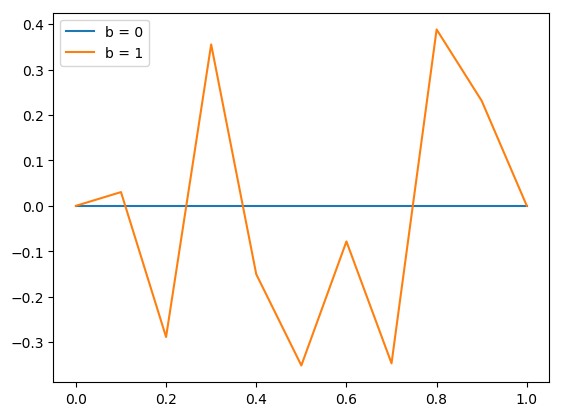

In [27]:
dt =.1
tmin, tmax = 0,1
N = Integer( (tmax-tmin)/h ) 
y_init = 0
pd = Normal()

ts = collect(tmin:h:tmax)
ys = zeros(1,N+1)
ys[1] = y_init

numSims=5
## Computing the Process

b= 0
for b = [0,1]
    for j = 1:numSims
        for i = 2:N
            y = ys[i-1]
            sigma   =  b
            dW      = rand(pd,1)
            ys[i] = ys[i] - y *dt  + sigma * dW[1]
        end
    end

    ys = ys ./ N
    plot(ts, ys[1,:],label="b = $(b)")
end
legend()
show()

# Question 6

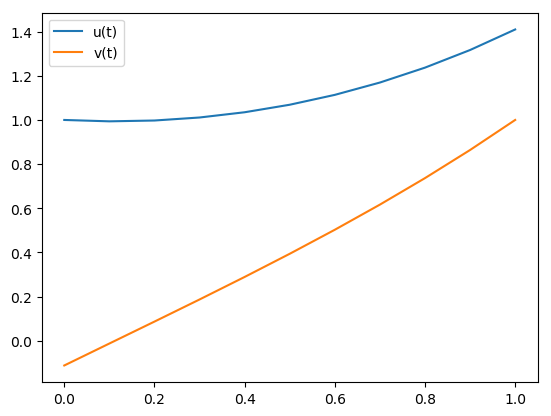

[-0.112093]

PyObject <matplotlib.legend.Legend object at 0x7fe93e1bff98>

In [64]:
xmin= 0
xmax= 1
f(x) = [x[2],x[1]]



function trajectory(v0,xmin,xmax,h,f)
    N = Integer( (xmax-xmin)/h )
    ys = zeros(2,N+1)
    ts = collect(tmin:h:tmax)
    ys[:,1] = [1, v0]
    for i =1:N
        y_pred = ys[:,i] + h .* f(ys[:,i])
        ys[:,i+1]= ys[:,i] + .5 .* h .* (f(ys[:,i]) + f(y_pred))
    end
    return ys
end


h= .1
#solve for the initial v0 using shooting
eq(x) = 1-trajectory(x[1],xmin,xmax,h,f)[2,end]
v0 = nlsolve(eq,[0.0])
ys1 = trajectory(v0.zero[1],xmin,xmax,h,f)
plot(ts,ys[1,:],label = "u(t)")
plot(ts,ys[2,:],label = "v(t)")
legend()


h=.2
#solve for the initial v0 using shooting
eq(x) = 1-trajectory(x[1],xmin,xmax,h,f)[2,end]
v0 = nlsolve(eq,[0.0])
ys1 = trajectory(v0.zero[1],xmin,xmax,h,f)

plot(ts,ys[1,:],label = "u(t)")
plot(ts,ys[2,:],label = "v(t)")
legend()


#look at every other?